In [2]:
# https://towardsdatascience.com/a-gentle-introduction-to-maximum-likelihood-estimation-9fbff27ea12f

In [13]:
import numpy as np, pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.optimize import minimize
import scipy.stats as stats

import pymc3 as pm3
import numdifftools as ndt
import statsmodels.api as sm
from statsmodels.base.model import GenericLikelihoodModel
%matplotlib inline

In [8]:
N = 100
x = np.linspace(0, 20, N)
E = np.random.normal(loc=0.0, scale=5.0, size=N)
y = 3*x + E

In [9]:
df = pd.DataFrame({'y' : y, 'x' : x})
df['constant'] = 1

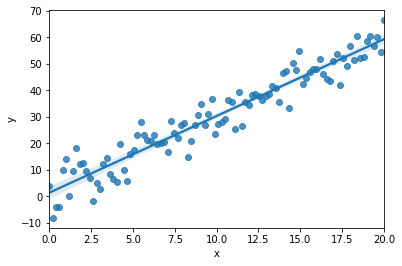

In [10]:
sns.regplot(df.x, df.y)

In [14]:
# split features and target
X = df[['constant', 'x']]

# fit the model and summarize
sm.OLS(y, X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     1084.
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           8.67e-55
Time:                        21:26:12   Log-Likelihood:                -304.38
No. Observations:                 100   AIC:                             612.8
Df Residuals:                      98   BIC:                             618.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant       1.3656      1.018      1.341      0.183      -0.655       3.386
x              2.8956      0.088     32.922      0.000       2.721       3.070
==============================================================================
Omnibus:                        0.965   Durbin-Watson:                   1.806
Prob(Omnibus):                  0.617   Jarque-Bera (JB):                0.979
Skew:                          -0.098   Prob(JB):                        0.613
Kurtosis:                       2.557   Cond. No.                         23.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
def MLERegression(params):
    # inputs are guesses at our parameters
    intercept, beta, sd = params[0], params[1], params[2]
    yhat = intercept + beta * x # predictions
    
    # next, we flip the Bayesian questions
    # compute PDF of observed values normally
    # distributed around mean (yhat)
    # with a standard deviation of sd
    
    negLL = -np.sum(stats.norm.logpdf(y, loc=yhat, scale=sd))
    return negLL

In [16]:
guess = np.array([5, 5, 2])

results = minimize(MLERegression, guess, method='Nelder-Mead',
                  options ={'disp' : True})

Optimization terminated successfully.
         Current function value: 304.377491
         Iterations: 100
         Function evaluations: 178


In [17]:
results

 final_simplex: (array([[1.36557263, 2.89565141, 5.07758846],
       [1.36554596, 2.89565198, 5.07757477],
       [1.36566142, 2.8956444 , 5.07756315],
       [1.36566842, 2.89564019, 5.07759404]]), array([304.37749094, 304.37749094, 304.37749094, 304.37749094]))
           fun: 304.3774909352226
       message: 'Optimization terminated successfully.'
          nfev: 178
           nit: 100
        status: 0
       success: True
             x: array([1.36557263, 2.89565141, 5.07758846])

In [18]:
resultsdf = pd.DataFrame({'coef' : results['x']})
resultsdf.index = ['constant', 'x', 'sigma']
np.round(resultsdf.head(2), 4)

,coef
constant,1.3656
x,2.8957
